# Helper functions for tokenizing, sequencing and padding sequences

In [ ]:
from collections import Counter

# Assuming the tokenize function is defined elsewhere
def tokenize(text):
    # Tokenization logic, removing HTML and stopwords as discussed earlier
    soup = BeautifulSoup(text, "html.parser")
    cleaned_text = soup.get_text()
    tokens = cleaned_text.lower().split()
    filtered_tokens = [token for token in tokens if token not in stopwords]
    return filtered_tokens

def build_vocab(sentences):
    counter = Counter()
    for text in sentences:
        counter.update(tokenize(text))

    # Sort words by frequency in descending order
    sorted_words = sorted(counter.items(), key=lambda x: x[1], reverse=True)

    # Create vocabulary with indices starting from 1
    vocab = {word: idx + 1 for idx, (word, _) in enumerate(sorted_words)}
    vocab['<pad>'] = 0  # Add padding token with index 0
    return vocab


from collections import Counter
from typing import List, Dict, Tuple, Union

def texts_to_sequences(sentences, word_index):
    sequences = []
    for sentence in sentences:
        sequence = []
        for word in sentence.split():
            if word in word_index:
                sequence.append(word_index[word])
        sequences.append(sequence)
    return sequences

from typing import List

def pad_sequences(sequences, max_len):
    padded_sequences = []
    for seq in sequences:
        if len(seq) > max_len:
            padded_seq = seq[:max_len]
        else:
            padded_seq = seq + [0] * (max_len - len(seq))
        padded_sequences.append(padded_seq)
    return padded_sequences

def word_frequency(sentences, word_dict):
    frequency = {word: 0 for word in word_dict}

    for sentence in sentences:
        words = sentence.lower().split()
        for word in words:
            if word in frequency:
                frequency[word] += 1

    return frequency


In [ ]:
# Handling Stop Words
import json


from bs4 import BeautifulSoup
import string

stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at",
             "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do",
             "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having",
             "he", "hed", "hes", "her", "here", "heres", "hers", "herself", "him", "himself", "his", "how",
             "hows", "i", "id", "ill", "im", "ive", "if", "in", "into", "is", "it", "its", "itself",
             "lets", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought",
             "our", "ours", "ourselves", "out", "over", "own", "same", "she", "shed", "shell", "shes", "should",
             "so", "some", "such", "than", "that", "thats", "the", "their", "theirs", "them", "themselves", "then",
             "there", "theres", "these", "they", "theyd", "theyll", "theyre", "theyve", "this", "those", "through",
             "to", "too", "under", "until", "up", "very", "was", "we", "wed", "well", "were", "weve", "were",
             "what", "whats", "when", "whens", "where", "wheres", "which", "while", "who", "whos", "whom", "why",
             "whys", "with", "would", "you", "youd", "youll", "youre", "youve", "your", "yours", "yourself",
             "yourselves"]

table = str.maketrans('', '', string.punctuation)

--2024-10-29 16:35:08--  https://storage.googleapis.com/learning-datasets/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.207, 74.125.20.207, 74.125.135.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.08s   

2024-10-29 16:35:08 (64.5 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



<ipython-input-3-267c86edcbcc>:17: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(sentence)


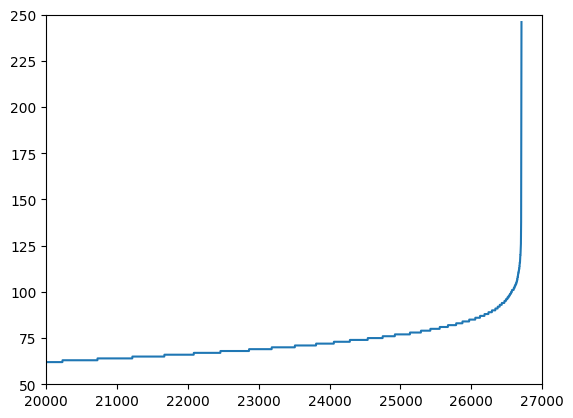

62


In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/sarcasm.json \
    -O /tmp/sarcasm.json


with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)


sentences = []
labels = []
urls = []
for item in datastore:
    sentence = item['headline'].lower()
    sentence = sentence.replace(",", " , ")
    sentence = sentence.replace(".", " . ")
    sentence = sentence.replace("-", " - ")
    sentence = sentence.replace("/", " / ")
    soup = BeautifulSoup(sentence)
    sentence = soup.get_text()
    words = sentence.split()
    filtered_sentence = ""
    for word in words:
        word = word.translate(table)
        if word not in stopwords:
            filtered_sentence = filtered_sentence + word + " "
    sentences.append(filtered_sentence)
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])

xs=[]
ys=[]
current_item=1
for item in sentences:
  xs.append(current_item)
  current_item=current_item+1
  ys.append(len(item))
newys = sorted(ys)

import matplotlib.pyplot as plt
plt.plot(xs,newys)
plt.axis([20000, 27000, 50, 250])
plt.show()

print(newys[20000])





In [ ]:
#vocab_size = 10000
#embedding_dim = 16
max_length = 100
#trunc_type='post'
#padding_type='post'
#oov_tok = "<OOV>"
training_size = 23000

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

word_index = build_vocab(training_sentences)
training_sequences = texts_to_sequences(training_sentences, word_index)
training_padded = pad_sequences(training_sequences, max_len=max_length)


testing_sequences = texts_to_sequences(testing_sentences, word_index)
testing_padded = pad_sequences(testing_sequences, max_len=max_length)

word_freq = word_frequency(training_sentences, word_index)
print(word_freq)


{'new': 1318, 'trump': 1117, 'man': 1075, 'not': 634, 'just': 501, 'will': 484, 'one': 469, 'year': 440, 'report': 434, 'area': 421, 'donald': 407, 'day': 398, 'u': 398, 's': 392, 'can': 387, 'says': 385, 'woman': 378, 'first': 376, 'time': 365, 'like': 356, 'no': 352, 'get': 346, 'old': 332, 'trumps': 331, 'off': 326, 'now': 325, 'life': 319, 'obama': 317, 'people': 311, 'house': 290, 'women': 289, 'white': 281, 'back': 278, 'still': 276, 'make': 275, 'clinton': 264, '5': 260, 'world': 251, 'americans': 246, 'years': 240, 'way': 239, 'family': 231, 'black': 230, 'study': 225, 'gop': 218, 'best': 215, 'bill': 211, 'american': 208, 'school': 207, 'police': 206, 'watch': 206, '3': 205, 'show': 205, 'really': 200, 'president': 198, 'home': 196, 'last': 194, 'video': 194, 'finds': 194, 'death': 193, 'cant': 193, 'know': 193, '10': 192, 'things': 191, 'good': 191, 'going': 190, 'state': 189, 'hillary': 187, 'love': 184, 'nation': 177, 'may': 174, '2': 174, 'health': 172, 'say': 172, 'parent

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class TextClassificationModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim=24):
        super(TextClassificationModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.global_pool = nn.AdaptiveAvgPool1d(1)
        self.fc1 = nn.Linear(embedding_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.embedding(x)
        x = x.transpose(1, 2)  # Change for pooling layer
        x = self.global_pool(x).squeeze(2)
        x = self.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

# Assuming vocab_size and embedding_dim are defined
vocab_size = len(word_index)  # Example value
embedding_dim = 16  # Example value

# Create the model
model = TextClassificationModel(vocab_size, embedding_dim)

# Define loss function and optimizer
criterion = nn.BCELoss()
#optimizer = optim.Adam(model.parameters(), lr=0.0001, betas=(0.9, 0.999), amsgrad=False)
optim.Adam(model.parameters())

# Print model summary
print(model)

TextClassificationModel(
  (embedding): Embedding(24291, 16)
  (global_pool): AdaptiveAvgPool1d(output_size=1)
  (fc1): Linear(in_features=16, out_features=24, bias=True)
  (fc2): Linear(in_features=24, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import numpy as np

# Assuming your TextClassificationModel is already defined

# Convert your preprocessed data to PyTorch tensors
training_padded = torch.tensor(training_padded, dtype=torch.long)
testing_padded = torch.tensor(testing_padded, dtype=torch.long)
training_labels = torch.tensor(training_labels, dtype=torch.float32)
testing_labels = torch.tensor(testing_labels, dtype=torch.float32)

# Create DataLoader objects
batch_size = 32
train_dataset = TensorDataset(training_padded, training_labels)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = TensorDataset(testing_padded, testing_labels)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Model parameters
vocab_size = len(word_index) + 1  # Add 1 for padding token
embedding_dim = 100  # You can adjust this

# Initialize the model
model = TextClassificationModel(vocab_size, embedding_dim)

# Loss function and optimizer
#criterion = nn.BCELoss()
#optimizer = optim.Adam(model.parameters(), lr=0.0001, betas=(0.9, 0.999), amsgrad=False)
#optimzier = optim.Adam(model.parameters())


# Training loop
num_epochs = 100
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
train_loss_history = []
train_acc_history = []
val_loss_history = []
val_acc_history = []
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    train_correct = 0
    train_total = 0

    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_total += targets.size(0)
        train_correct += ((outputs.squeeze() > 0.5) == targets).sum().item()

    # Validation
    model.eval()
    val_loss = 0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), targets)

            val_loss += loss.item()
            val_total += targets.size(0)
            val_correct += ((outputs.squeeze() > 0.5) == targets).sum().item()

    print(f'Epoch {epoch+1}/{num_epochs}:')
    train_loss_history.append(train_loss/len(train_loader))
    train_acc_history.append(train_correct/train_total)
    val_loss_history.append(val_loss/len(test_loader))
    val_acc_history.append(val_correct/val_total)
    print(f'Train Loss: {train_loss/len(train_loader):.4f}, Train Acc: {train_correct/train_total:.4f}')
    print(f'Val Loss: {val_loss/len(test_loader):.4f}, Val Acc: {val_correct/val_total:.4f}')

# After training, you can save the model
torch.save(model.state_dict(), 'text_classification_model.pth')

<ipython-input-9-d3f16bac137a>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  training_padded = torch.tensor(training_padded, dtype=torch.long)
<ipython-input-9-d3f16bac137a>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  testing_padded = torch.tensor(testing_padded, dtype=torch.long)
<ipython-input-9-d3f16bac137a>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  training_labels = torch.tensor(training_labels, dtype=torch.float32)
<ipython-input-9-d3f16bac137a>:13: UserWarning: To copy construct from a tensor, it is recommended to 

Epoch 1/100:
Train Loss: 0.7150, Train Acc: 0.4404
Val Loss: 0.7175, Val Acc: 0.4300
Epoch 2/100:
Train Loss: 0.7150, Train Acc: 0.4404
Val Loss: 0.7175, Val Acc: 0.4300
Epoch 3/100:
Train Loss: 0.7150, Train Acc: 0.4404
Val Loss: 0.7175, Val Acc: 0.4300
Epoch 4/100:
Train Loss: 0.7150, Train Acc: 0.4404
Val Loss: 0.7175, Val Acc: 0.4300
Epoch 5/100:
Train Loss: 0.7150, Train Acc: 0.4404
Val Loss: 0.7175, Val Acc: 0.4300
Epoch 6/100:
Train Loss: 0.7150, Train Acc: 0.4404
Val Loss: 0.7175, Val Acc: 0.4300
Epoch 7/100:
Train Loss: 0.7150, Train Acc: 0.4404
Val Loss: 0.7175, Val Acc: 0.4300
Epoch 8/100:
Train Loss: 0.7150, Train Acc: 0.4404
Val Loss: 0.7175, Val Acc: 0.4300
Epoch 9/100:
Train Loss: 0.7150, Train Acc: 0.4404
Val Loss: 0.7175, Val Acc: 0.4300
Epoch 10/100:
Train Loss: 0.7150, Train Acc: 0.4404
Val Loss: 0.7175, Val Acc: 0.4300
Epoch 11/100:
Train Loss: 0.7150, Train Acc: 0.4404
Val Loss: 0.7175, Val Acc: 0.4300
Epoch 12/100:
Train Loss: 0.7150, Train Acc: 0.4404
Val Loss: 0

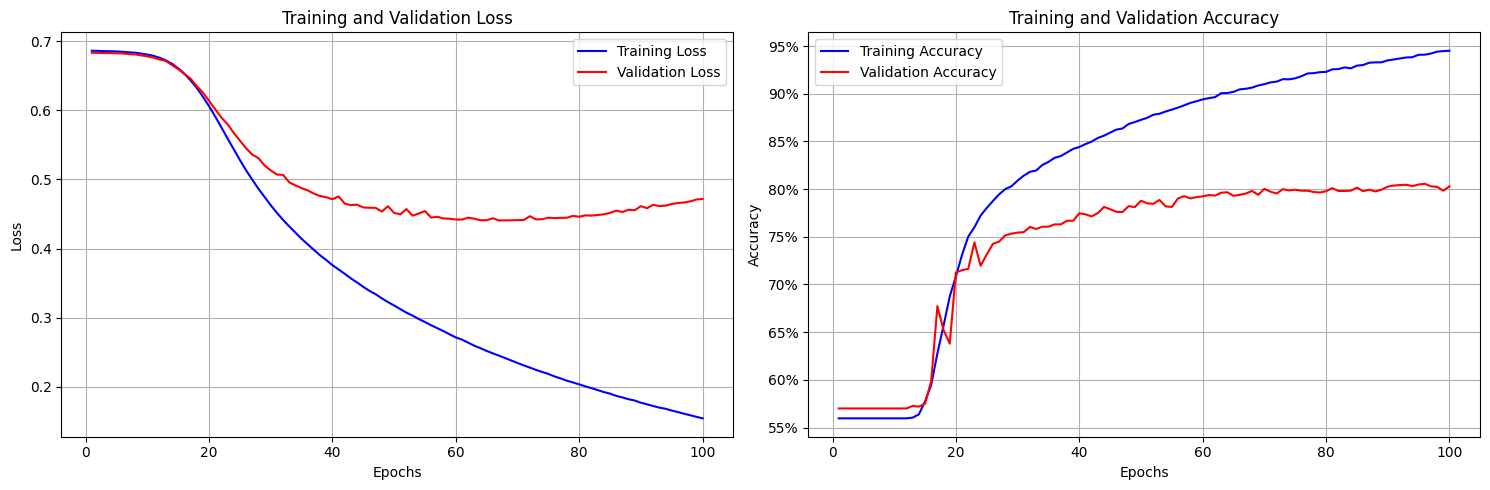

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_training_metrics(train_loss, train_acc, val_loss, val_acc):
    """
    Plot training and validation metrics on two subplots.

    Args:
        train_loss: Array of training loss values
        train_acc: Array of training accuracy values
        val_loss: Array of validation loss values
        val_acc: Array of validation accuracy values
    """
    # Create figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot epochs on x-axis
    epochs = range(1, len(train_loss) + 1)

    # First subplot: Loss
    ax1.plot(epochs, train_loss, 'b-', label='Training Loss')
    ax1.plot(epochs, val_loss, 'r-', label='Validation Loss')
    ax1.set_title('Training and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True)

    # Second subplot: Accuracy
    ax2.plot(epochs, train_acc, 'b-', label='Training Accuracy')
    ax2.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
    ax2.set_title('Training and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)

    # Add accuracy percentage labels
    ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

    # Adjust layout to prevent overlap
    plt.tight_layout()

    return fig

# Usage example:
plot_training_metrics(train_loss_history, train_acc_history, val_loss_history, val_acc_history)
plt.show()

In [ ]:
!pip install torchinfo

In [ ]:
print(vocab_size)

24292


In [ ]:
from torchinfo import summary
summary(model,
        input_size=(batch_size, max_length),
        dtypes=[torch.long],  # Specify long dtype for embedding layer
        device='cpu')

Layer (type:depth-idx)                   Output Shape              Param #
TextClassificationModel                  [32, 1]                   --
├─Embedding: 1-1                         [32, 100, 100]            2,429,200
├─AdaptiveAvgPool1d: 1-2                 [32, 100, 1]              --
├─Linear: 1-3                            [32, 24]                  2,424
├─ReLU: 1-4                              [32, 24]                  --
├─Linear: 1-5                            [32, 1]                   25
├─Sigmoid: 1-6                           [32, 1]                   --
Total params: 2,431,649
Trainable params: 2,431,649
Non-trainable params: 0
Total mult-adds (M): 77.81
Input size (MB): 0.03
Forward/backward pass size (MB): 2.57
Params size (MB): 9.73
Estimated Total Size (MB): 12.32